# Software Evolution Part II

## Group Members:
1. Andy Aidoo, 17-700-451
2. Christian Omlin,
3. Wesley Müri,

## Task Context:
In this assigment we will be analyzing the elasticsearch project. All following tasks should be done with the subset of commits from tag `v1.0.0` to tag `v1.1.0`.
### Website:
https://github.com/elastic/elasticsearch
(https://github.com/elastic/elasticsearch)

### Repository:

https://github.com/elastic/elasticsearch.git
(https://github.com/elastic/elasticsearch.git)

In [3]:
from enum import Enum


class Modification(Enum):
    ADDED = 'Lines added'
    REMOVED = 'Lines removed'
    TOTAL = 'Lines added + lines removed'
    DIFF = 'Lines added - lines removed'


## Task 1: Author analysis
In the following, please only consider `java` files.

The first task is to get an overview of the author ownership of the elasticsearch project. In particular, we want to understand who are the main authors in the system between the two considered tags, the authors distribution among files and the files distribution among authors. To this aim, perform the following:

* create a dictionary (or a list of tuples) with the paris author => number of modified files
* create a dictionary (or a list of tuples) with the paris files => number of authors who modified the file
* visualize the distribution of authors among files: the visualization should have on the x axis the number of authors per file (from 1 to max), and on the y axis the number of files with the given number of authors (so for example the first bar represents the number of files with a single author)
* visualize the distribution of files among authors: the visualization should have on the x axis the number of files per author (from 1 to max), and on the y axis the number of authors who modified the given number of files (so for example the first bar represents the minior contributors, i.e., the number of authors who vhanged only 1 file)

Comment the two distribution visualizations.

Now, let's look at the following 3 packages inmore detail:
1. `src/main/java/org/elasticsearch/search`
2. `src/main/java/org/elasticsearch/index`
3. `src/main/java/org/elasticsearch/action`

Create a function that, given the path of a package and a modification type (See class Modification above), returns a dictionary of authors => number, where the number counts the total lines added or removed or added+removed or added-removed (depending on the fiven Modification parameter), for the given package.
To compute the value at package level, you should aggreagate the data per file.

Using the function defined above, visualize the author contributions (lines added + lines removed). The visualization should have the author on the x axis and the total lines on the y axis. Sort the visualization in decreasing amount of contributions, i.e., the main author should be first.

Compare the visualization for the 3 packages and comment.

In [4]:
# all needed imports
import tqdm
import json
import matplotlib.pyplot as plt

from tempfile import TemporaryDirectory
from git import Repo
from pydriller import Git, Repository
from collections import Counter
from datetime import datetime


In [5]:
# create a temporary directory
temp_dir = TemporaryDirectory()

# clone elastic search into temp dir
Repo.clone_from('https://github.com/elastic/elasticsearch', temp_dir.name)

# store pydriller object
elastic_repo = Git(temp_dir.name)

from_tag = 'v1.0.0'
to_tag = 'v1.1.0'

repo = Repository(temp_dir.name,
                  order='date-order',
                  from_tag=from_tag,
                  to_tag=to_tag)


def in_scope(filename):
    return filename.endswith('.java')


def get_path(file):
    return file.new_path if file.new_path else file.old_path


In [6]:
def iterate_project():
    authors = {}
    files = {}
    for commit in repo.traverse_commits():
        author = commit.author.name
        modified_files = []
        for file in commit.modified_files:
            path = get_path(file)
            if in_scope(path):
                fpath = path.replace('src/main/java/org/elasticsearch/', '')
                modified_files.append(fpath)

                # update authors for current file
                if fpath in files:
                    files[fpath].add(author)
                else:
                    files[fpath] = {author}

        # update modified files for current author
        if author in authors:
            authors[author].update(modified_files)
        elif len(modified_files) > 0:
            authors[author] = set(modified_files)

    return authors, files


In [7]:
authors, files = iterate_project()


**files_per_author**
* create a dictionary (or a list of tuples) with the paris author => number of modified files

**authors_per_file**
* create a dictionary (or a list of tuples) with the paris files => number of authors who modified the file

In [8]:
# create a dictionary (or a list of tuples) with the paris author => number of modified files
files_per_author = []

# create a dictionary (or a list of tuples) with the paris files => number of authors who modified the file
authors_per_file = []

for k, v in authors.items():
    files_per_author.append(dict(author=k, modified_files=len(v)))

for k, v in files.items():
    authors_per_file.append(dict(file=k, authors=len(v)))

print('FILES PER AUTHOR:')
print(json.dumps(files_per_author, indent=2))

print('AUTHORS PER FILE:')
print(json.dumps(authors_per_file, indent=2))


FILES PER AUTHOR:
[
  {
    "author": "Simon Willnauer",
    "modified_files": 146
  },
  {
    "author": "Lee Hinman",
    "modified_files": 68
  },
  {
    "author": "Adrien Grand",
    "modified_files": 162
  },
  {
    "author": "Martijn van Groningen",
    "modified_files": 166
  },
  {
    "author": "uboness",
    "modified_files": 108
  },
  {
    "author": "Luca Cavanna",
    "modified_files": 60
  },
  {
    "author": "Paul Horn",
    "modified_files": 1
  },
  {
    "author": "Nik Everett",
    "modified_files": 23
  },
  {
    "author": "Andrew Raines",
    "modified_files": 13
  },
  {
    "author": "Shay Banon",
    "modified_files": 79
  },
  {
    "author": "David Pilato",
    "modified_files": 47
  },
  {
    "author": "Alexander Reelsen",
    "modified_files": 27
  },
  {
    "author": "Igor Motov",
    "modified_files": 59
  },
  {
    "author": "Mark Conlin",
    "modified_files": 2
  },
  {
    "author": "George P. Stathis",
    "modified_files": 6
  },
  {
    "aut

In [9]:
def visualize_modifications(vis_list, ind, xlabel, ylabel):
    author_values = [x[ind] for x in vis_list]
    author_counter = Counter(author_values)

    x_values_a = range(1, max(author_counter.keys()))
    y_values_a = [author_counter[x] for x in x_values_a]

    plt.bar(x_values_a, y_values_a, align='center')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


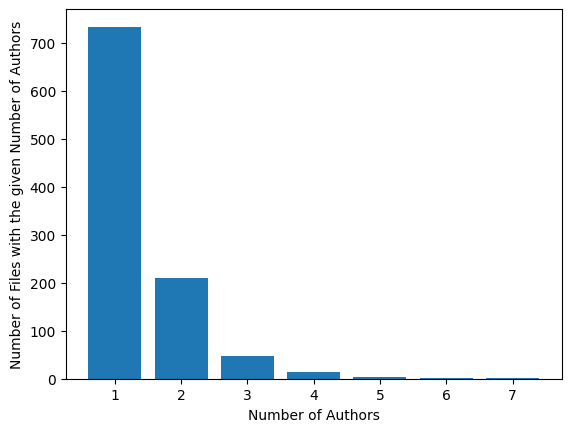

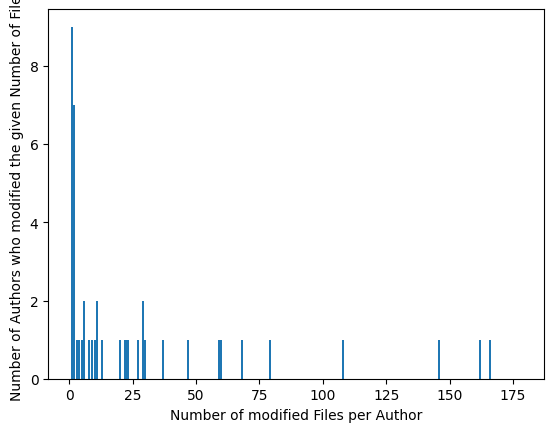

In [10]:
visualize_modifications(authors_per_file,
                        'authors',
                        'Number of Authors',
                        'Number of Files with the given Number of Authors'
                        )

visualize_modifications(files_per_author,
                        'modified_files',
                        'Number of modified Files per Author',
                        'Number of Authors who modified the given Number of Files'
                        )


### Plot Commentary
The majority of files have one author, while the majority of developers have only worked on a single file. A select few authors seem to be involved a plethora of files. This lets me assume that those developers do the majority of heavy lifting in the development of the open source project `elastic-search`.

In [11]:
packages = [
    'src/main/java/org/elasticsearch/search',
    'src/main/java/org/elasticsearch/index',
    'src/main/java/org/elasticsearch/action'
]


def package_scope(package, file):
    return (file.old_path and file.old_path.startswith(package)) or (
        file.new_path and file.new_path.startswith(package))


def analyse_repo(package, mod_type):
    author_changes = {}
    for commit in repo.traverse_commits():
        for file in commit.modified_files:
            if package_scope(package, file):
                author = commit.author.name
                match mod_type:
                    case Modification.ADDED: changes = file.added_lines
                    case Modification.REMOVED: changes = file.deleted_lines
                    case Modification.TOTAL: changes = file.added_lines + file.deleted_lines
                    case Modification.DIFF: changes = file.added_lines - file.deleted_lines
                if author in author_changes:
                    author_changes[author] += changes
                else:
                    author_changes[author] = changes
    return author_changes


In [12]:
author_contributions = [analyse_repo(
    package, Modification.TOTAL) for package in packages]


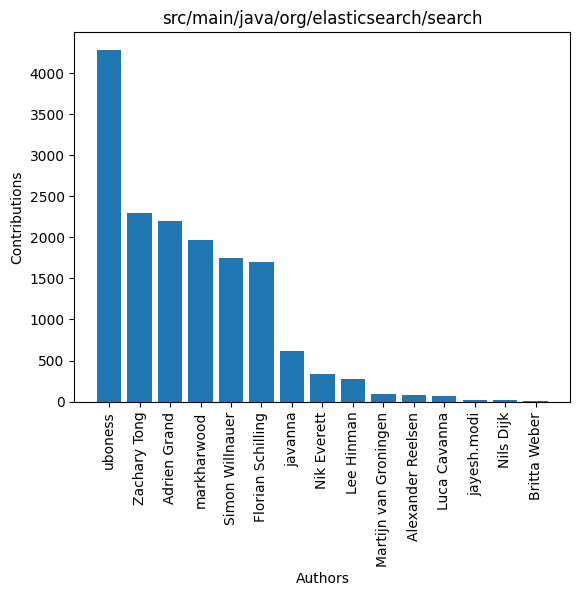

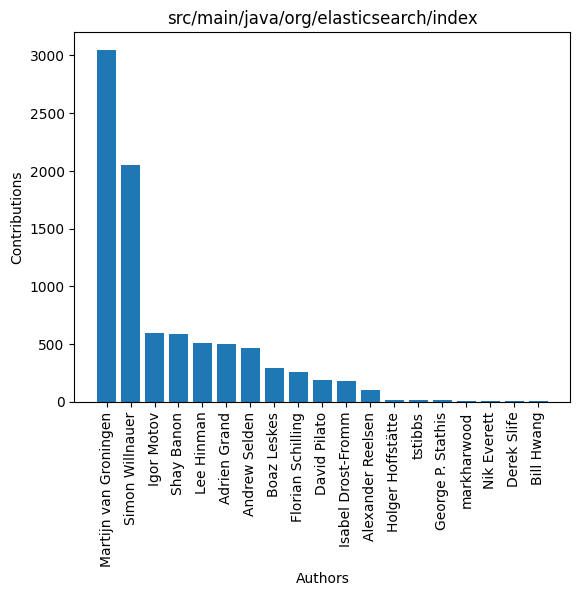

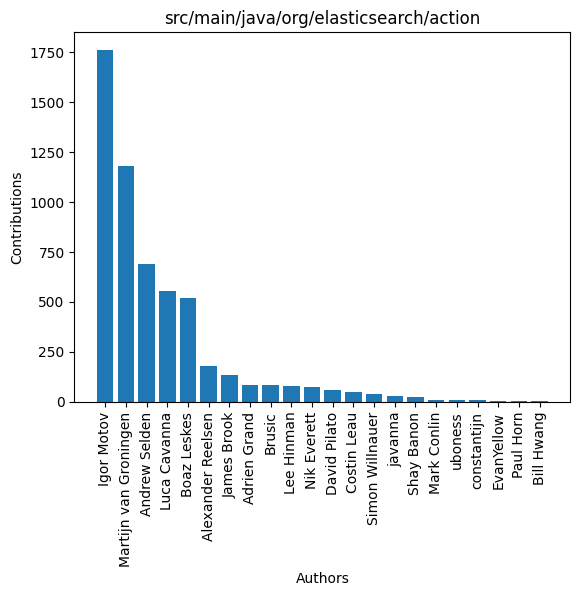

In [13]:
def create_plot(contributions, title):
    sorted_dict = dict(sorted(contributions.items(),
                       key=lambda item: item[1], reverse=True))
    plt.bar(
        list(sorted_dict.keys()),
        list(sorted_dict.values()),
    )

    plt.title(title)
    plt.tick_params('x', rotation=90)
    plt.xlabel('Authors')
    plt.ylabel('Contributions')
    plt.show()


for i, file in enumerate(packages):
    create_plot(author_contributions[i], file)


### Plot Commentary
In the package `search` the main three contributors are:
1. uboness
2. Simon Willnauer
3. Adrien Grand


In the package `index` the main three contributors are:
1. Martijn van Groningen
2. Simon Willnauer
3. Igor Motov

In the package `action` the main three contributors are:
1. Igor Motov
2. Martijn van Groningen
3. Andrew Selden

These main contributors are responsible for more than 50% of the modifications of the three packages.

## Knowledge loss
We want to analyze the knowledge loss when the main contributor of the analyzed project would leave. For this we will us the circle packaging layout introduced in the "Code as a Crime Scene" book. It should show how mmuch of each file was written be the main contributor of *elasticsearch* (according to the analysis above using Modification.TOTAL) and indicate which areas would be affected most when this contributor leaves the project. This assignment includes the necessary `knwledge_loss.html` file as well as the `d3` folder with the d3 dependencies. Your task is to create the `output.json` file according to the specification below. This file can then be visualized with t he files provided.

For showing the visualization, once you have the output as `output.json` you should
* make sure to have the `knowledge_loss.html` file in the same folder
* start a local HTTP server in the same folder (e.g. with python `python3 -m http.server` serving necessary for d3)
* open the served `knowledge_loss.html` and look at the visualization

For testing, you can use the provided `output.json` and should see a circle packaging layout with two circles, one big red, and one small white-red.

For the package you identify as the worst in terms of knowledge loss, investigate the author contributions using the function defined in the previous exercise and comment how the situation is, e.g. how big the gap between the main author and the second biggest contributor for the selected package is.

### Output Format for Visualization
Example:
* `root` is always the root of the tree
* `size` should be the total number of lines of contribution
* `weight` can be sett to the same as `size`
* `ownership` should be set to the percentage of contributions from the `main` author (e.g. 0.98 for 98% if contributions coming from the main author)

```
{ 
 "name": "root", 
 "children": [ 
   { 
     "name": "test", 
     "children": [ 
       { 
         "name": "benchmarking", 
         "children": [ 
           { 
             "author_color": "red", 
             "size": "4005", 
             "name": "t6726-patmat-analysis.scala", 
             "weight": 1.0, 
             "ownership": 0.9, 
             "children": [] 
           }, 
           { 
             "author_color": "red", 
             "size": "55", 
             "name": "TreeSetIterator.scala", 
             "weight": 0.88, 
             "ownership": 0.2, 
             "children": [] 
           } 
         ]
       } 
     ] 
   } 
 ] 
}
```
### JSON Export
For exporting the data to JSON you can use the following snippet:

In [14]:
import json


def export_json(tree, suff=''):
    with open(f"output{suff}.json", "w") as file:
        json.dump(tree, file, indent=4)


In [15]:
# compute modifications by authors and get most active author

all_contributions = analyse_repo(
    'src/main/java/org/elasticsearch', Modification.TOTAL)

# sort dict and print all element for debugging
# print(dict(sorted(all_contributions.items(), key=lambda el: el[1], reverse=True)))

main_contributor = max(all_contributions, key=all_contributions.get)
main_contributor


'Martijn van Groningen'

In [16]:
def compute_contributions_of_author(name, package=''):
    contributions = {}
    for commit in repo.traverse_commits():
        author = commit.author.name
        for file in commit.modified_files:
            path = get_path(file)
            if in_scope(path) & path.startswith(package):
                modifications = file.added_lines + file.deleted_lines
                if path in contributions:
                    contributions[path]['total'] += modifications
                    if author == name:
                        contributions[path]['main contributor'] += modifications
                else:
                    contributions[path] = {
                        'total': modifications,
                        'main contributor': modifications if author == name else 0
                    }
    # only return files where the specified author contributed
    return {k: v for k, v in contributions.items() if v['main contributor'] > 0}


def create_output(cont_dict):

    output = {'name': 'root', 'children': []}

    for fpath in cont_dict.keys():

        path_parts = fpath.split('/')
        root = output

        for index, path_part in enumerate(path_parts):
            #             print(index, path_part)
            # traverse tree of existing nodes until end of branch is reached
            if any(x for x in root['children'] if x['name'] == path_part):
                root = next(x for x in root['children']
                            if x['name'] == path_part)
            # add new file to output tree
            else:
                new_node = {'name': path_part, 'children': []}
                # only add new node if it is a file
                if index == len(path_parts) - 1:
                    new_node['author_color'] = 'red'
                    new_node['size'] = cont_dict[fpath]['total']
                    new_node['weight'] = cont_dict[fpath]['main contributor']
                    new_node['ownership'] = cont_dict[fpath]['main contributor'] / \
                        cont_dict[fpath]['total']

                root['children'].append(new_node)
                # rebase node root to the lowest level possible
                root = new_node
    return output


In [17]:
main_contributions = compute_contributions_of_author(
    name='Martijn van Groningen')
export_json(create_output(main_contributions))


We decided to analyse the `index` package, as the visualization highlights this package, especially.

In [18]:
main_contributions = compute_contributions_of_author(
    name='Martijn van Groningen', package='src/main/java/org/elasticsearch/index')
export_json(tree=create_output(main_contributions), suff='_index')


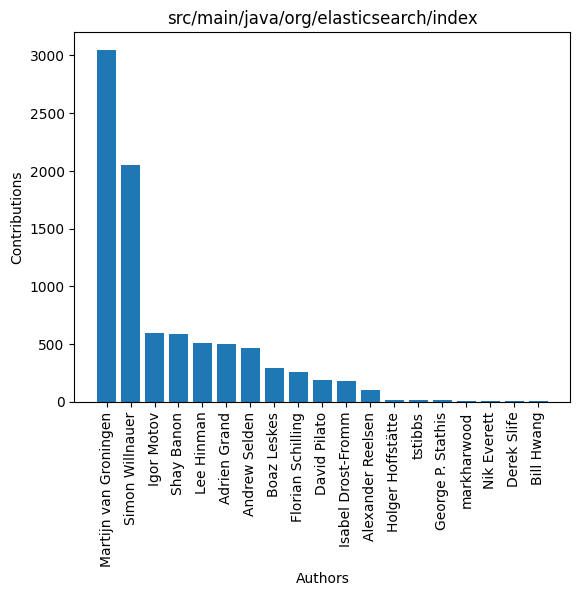

In [19]:
package = 'src/main/java/org/elasticsearch/index'

package_contr = analyse_repo(package=package, mod_type=Modification.TOTAL)

create_plot(contributions=package_contr, title=package)


### Plot Commentary
The visualization of `knowledge_loss.html` indicates that the knowledge loss is greatest in the package `index`:

![image.png](img/knowledge_loss.png)

Thus, we analyzed the `index`-package and the visualization above shows, that the main author has 50% more contributions than the second. It looks like Martijn has contributed as much as all the other contributions with the exception of Simon.

## Task 3: Code Churn Analysis
The third and last task is to analysze the code churn of the `elastic` project. For this analysis we look at the code churn, meaning the daily change in hte total number of lines of the project. Visualize the code churn over time bucketing the data by day. Remember that you'll need to fill the gaps for days when there are no commits. Choose a filling stategy and justify it.

Look at the churn trend over time and identify two outliers. For each of then:
* identify if it was caused by a single or multiple commits (since you are bucketing the data by day)
* find the has of the involved commit(s)
* find the involved files
* look at the actual diff

Based on the above, discuss if the outlier is a false positive or should be a reason for concern.

In [20]:
import tqdm

from tqdm import tqdm


def analyse_repo_churn(package):

    cumm_changes_ts = {}

    for commit in tqdm(repo.traverse_commits()):
        commit_hash = commit.hash
        commit_date = commit.committer_date
        for file in commit.modified_files:
            fpath = get_path(file)
            if in_scope(fpath) and fpath.startswith(package):
                changes = file.added_lines + file.deleted_lines
                date = commit.committer_date
                if date in cumm_changes_ts:
                    cumm_changes_ts[date]['additions'] += commit.insertions
                    cumm_changes_ts[date]['deletions'] += commit.deletions
                else:
                    cumm_changes_ts[date] = {
                        'additions': commit.insertions,
                        'deletions':  commit.deletions,
                    }
    return cumm_changes_ts


def create_plot2(data, title):
    x_val = data.keys()

    plt.plot(x_val, [x['additions'] for x in data.values()], label='additions')
    plt.plot(x_val, [x['deletions'] for x in data.values()], label='deletions')

    plt.legend()
    plt.title(title)
    plt.tick_params('x', rotation=90)


516it [00:18, 27.18it/s]


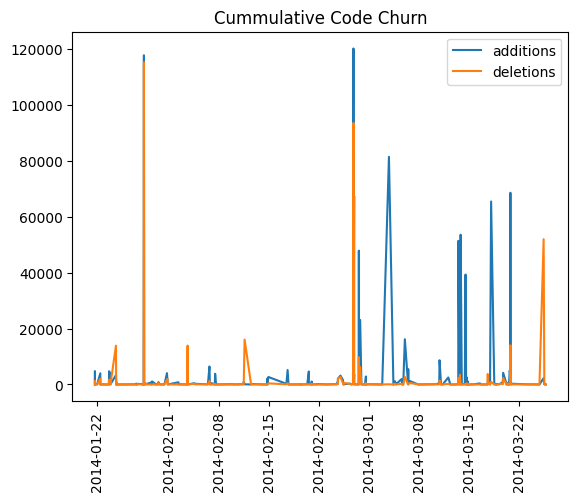

In [21]:
code_churn = analyse_repo_churn('src/main/java/org/elasticsearch')

create_plot2(code_churn, 'Cummulative Code Churn')


In [22]:

def zoom_in(start_date, end_date):
    daily_repo = Repository(
        temp_dir.name,
        order='date-order',
        since=start_date,
        to=end_date
    )

    max_insertions = []
    max_deletions = []
    data = {}

    for commit in daily_repo.traverse_commits():

        commit_hash = commit.hash
        commit_date = str(commit.committer_date)
        msg = commit.msg
        deletions = commit.deletions
        insertions = commit.insertions

        max_insertions.append(insertions)
        max_deletions.append(deletions)

        if (commit.insertions > 2000) or (
                commit.deletions > 2000):

            data[commit_hash] = {
                'date': commit_date,
                'insertions': insertions,
                'deletions': deletions,
                'message': msg,
            }
    meta = {
        'max_insertions': max(max_insertions),
        'max_deletions': max(max_deletions)
    }
    return {
        'meta': meta,
        'data': data,
    }


In [23]:
export_json(tree=zoom_in(datetime(2014, 3, 8),
            datetime(2014, 3, 22)), suff='_zoom_in')


In [ ]:
def analyse_commits(hashs: list[str]):

    output = {}

    commits = Repository(temp_dir.name, only_commits=hashs).traverse_commits()

    for commit in commits:
        output[commit.hash] = {
            'date': str(commit.committer_date),
            'msg': commit.msg,
            'commit_insertions': commit.insertions,
            'commit_deletions': commit.deletions,
            'author': commit.author.name,
            'mod_files': [],

        }
        file_insights = {}

        for file in commit.modified_files:
            fpath = get_path(file)
            if in_scope(fpath):

                file_insights[fpath] = {
                    'additions': file.added_lines,
                    'deletions': file.deleted_lines,
                    'difference': file.added_lines - file.deleted_lines
                }

        # add list of file insights to output dict and sort it by most additions
        output[commit.hash]['mod_files'].append(dict(sorted(
            file_insights.items(), key=lambda item: item[1]['additions'], reverse=True)))
    return output


In [ ]:
import json

interested_commits = analyse_commits(['81e537bd5eb56f66b8ddd9ac59e5dd4a1630b931', '5821fa042cf0b376ee4743c8d50a8eb79f4f67aa',
                                      'a1192044f2ed26cd853bbd76974ebdfa935fc863', '89e45fde9ce3f5d3b964b7aa42de29ff4e1e488f'])

export_json(interested_commits, '_code_churn_analysis')


### Analysis Commentary

All commit but `81e537bd5eb56f66b8ddd9ac59e5dd4a1630b931` close an issue. This commit, however, seems to be an extension of the existing functionalities. The other three commit close the issues:
- 5426
- 4946
- 4637

In our opinion none of the analyzed commits seem to be false positives.